# Earthquake Visualization Project

In [ ]:
from google.colab import files
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving earthquake_csv.csv to earthquake_csv (3).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['earthquake_csv.csv']))

In [ ]:
df = df.drop(columns = ['horizontalError',
                        'depthError',
                        'magError',
                        'magNst',
                        'status',
                        'locationSource',
                        'magSource',
                        'magType',
                        'nst'])

In [ ]:
df


,time,latitude,longitude,depth,mag,gap,dmin,rms,net,id,updated,place,type
0,2021-05-21T18:04:13.537Z,34.6125,98.2458,10.00,7.30,9.0,7.769,0.80,us,us7000e54r,2021-06-03T01:00:05.209Z,"Southern Qinghai, China",earthquake
1,2021-03-20T09:09:43.966Z,38.4515,141.6477,43.00,7.00,35.0,2.378,0.75,us,us7000dl6y,2021-06-02T15:24:07.040Z,"30 km E of Ishinomaki, Japan",earthquake
2,2021-03-04T19:28:33.178Z,-29.7228,-177.2794,28.93,8.10,21.0,0.739,0.69,us,us7000dflf,2021-05-13T22:45:32.040Z,"Kermadec Islands, New Zealand",earthquake
3,2021-03-04T17:41:23.370Z,-29.6768,-177.8398,43.00,7.40,30.0,0.437,1.09,us,us7000dfk3,2021-05-13T22:45:25.040Z,"Kermadec Islands, New Zealand",earthquake
4,2021-03-04T13:27:34.647Z,-37.4787,179.4576,10.00,7.30,24.0,0.918,0.68,us,us7000dffl,2021-05-13T22:43:37.040Z,"182 km NE of Gisborne, New Zealand",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,1901-08-09T18:33:00.000Z,40.0000,144.0000,0.00,7.50,NaN,NaN,NaN,iscgem,iscgem16957736,2020-07-09T21:51:20.368Z,"off the east coast of Honshu, Japan",earthquake
1419,1901-08-09T13:01:00.000Z,-22.0000,170.0000,0.00,7.90,NaN,NaN,NaN,iscgem,iscgem16957737,2020-07-09T21:51:40.428Z,southeast of the Loyalty Islands,earthquake
1420,1900-10-29T09:11:00.000Z,11.0000,-66.0000,0.00,7.70,NaN,NaN,NaN,iscgem,iscgem16957719,2020-07-09T21:50:47.628Z,"offshore Miranda, Venezuela",earthquake
1421,1900-10-09T12:25:00.000Z,57.0900,-153.4800,NaN,7.86,NaN,NaN,NaN,ushis,ushis391,2019-05-02T20:46:08.555Z,"Kodiak Island region, Alaska",earthquake


Which place had the most earthquakes

In [ ]:
places = df['place'].tolist()

In [ ]:
places


['Southern Qinghai, China',
 '30 km E of Ishinomaki, Japan',
 'Kermadec Islands, New Zealand',
 'Kermadec Islands, New Zealand',
 '182 km NE of Gisborne, New Zealand',
 '73 km ENE of Namie, Japan',
 'southeast of the Loyalty Islands',
 '211 km SE of Pondaguitan, Philippines',
 '13 km NNE of Néon Karlovásion, Greece',
 '99 km SE of Sand Point, Alaska',
 '99 km SSE of Perryville, Alaska',
 '114 km NNW of Popondetta, Papua New Guinea',
 '9 km SE of Santa María Xadani, Mexico',
 'south of the Kermadec Islands',
 "221km SSE of Severo-Kuril'sk, Russia",
 "94km ENE of Kuril'sk, Russia",
 '123km NNW of Lucea, Jamaica',
 '138km E of Bitung, Indonesia',
 '93km NNE of Laiwui, Indonesia',
 '2019 Ridgecrest Earthquake Sequence',
 '292km NW of Saumlaki, Indonesia',
 "116km NE of L'Esperance Rock, New Zealand",
 '78km SE of Lagunas, Peru',
 '46km SSE of Namatanai, Papua New Guinea',
 '33km NW of Bulolo, Papua New Guinea',
 '23km NNE of Azangaro, Peru',
 '111km ESE of Palora, Ecuador',
 '96km ESE of P

In [ ]:
d = {}
for i in places:
  if i not in d.keys():
    d[i] = 1
  else:
    d[i] += 1
f = None
e = 0
for a, b in d.items():
  if b > e:
    e = b
    f = a

f

'Vanuatu'

In [ ]:
e

48

Add in Kmeans clustering


In [ ]:
def distanceL(pt1, pt2):
  return np.sqrt(np.square(pt1[0]-pt2[0]) + np.square(pt1[1]-pt2[1]))
def assignL(centroids, all_pts, mags):
  d = {}
  dmags = {}
  for ind, i in enumerate(all_pts):
    m = distanceL(i, centroids[0])
    n = 0
    for a in range(len(centroids)):
      x = distanceL(i, centroids[a])
      if x < m:
        m = x
        n = a
    if n not in d.keys():
      d[n] = [i]
      dmags[n] = [mags[ind]]
    else:
      d[n].append(i)
      dmags[n].append(mags[ind])
  return d, dmags
def new_centroidL(region_pts, mag, maxmag):
  a = 0
  b = 0
  l = len(region_pts)
  for ind, i in enumerate(region_pts):
    a += i[0] * (mags[ind]/maxmag)
    b += i[1] * (mags[ind]/maxmag)

  return [a/l, b/l]

In [ ]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:pink", "tab:brown", "tab:grey", "tab:cyan"]

In [ ]:
mags = df['mag'].tolist()
max_mag = max(mags)

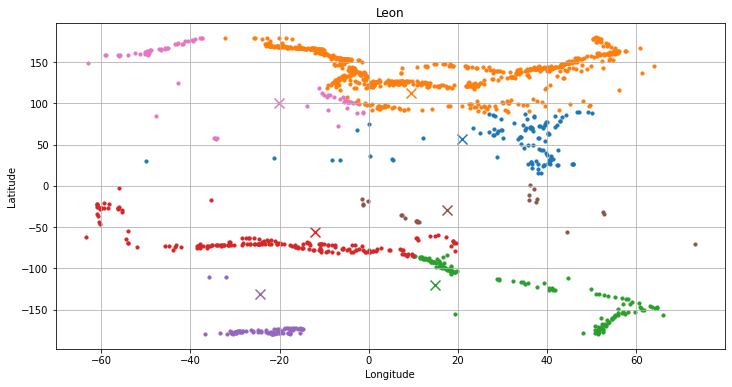

In [ ]:
k = 7
latitude = df['latitude'].tolist()
longitude = df['longitude'].tolist()
dataL = [[latitude[i], longitude[i]] for i in range(len(latitude))]
randLat = np.random.uniform(low=-1, high=1, size=k)*max(latitude)
randLon = np.random.uniform(low=-1, high=1, size=k)*max(longitude)
centroidL = [[randLat[i], randLon[i]] for i in range(len(randLat))]
fig, (ax1) = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [12, 6]
ax1.set_title('Leon')
ax1.set_ylabel("Latitude")
ax1.set_xlabel("Longitude")

cen, dmags = assignL(centroidL, dataL, mags)
  
max_itr = 100

itr = 0
for i in range(3):
  while itr < max_itr:
    centroidL = []
    for i in cen.keys():
      x = new_centroidL(cen[i], dmags[i], max_mag)
      centroidL.append(x)
    newcen, newmags = assignL(centroidL, dataL, mags)
    itr += 1

cen = newcen
mags = newmags
for i in cen.keys():
  ax1.scatter(centroidL[i][0], centroidL[i][1], marker = "x", s = 100, color = colors[i])
  for j in cen[i]:
    ax1.scatter(j[0], j[1], marker = "o", s = 10, color = colors[i])

ax1.grid('on')
plt.show()

In [ ]:
centroidL

[[20.868957129186597, 50.54794630940989],
 [6.777020549604098, 110.65506706101539],
 [-18.383968709273177, -137.3008687969925],
 [16.67507708647557, -76.31485476323778],
 [-44.97566842105263, -27.911286243194194],
 [-6.981302735116481, -75.63185606557373],
 [1.2177634210526322, -17.14232697368421]]

In [ ]:
cen

{0: [[37.8973, 26.7838],
  [34.9109, 45.9592],
  [38.2107, 72.7797],
  [36.5244, 70.3676],
  [27.8087, 86.0655],
  [28.2305, 84.7314],
  [26.951, 65.5009],
  [28.033, 61.996],
  [38.721, 43.508],
  [28.776999999999997, 63.951],
  [35.49, 81.467],
  [-21.324, 33.583],
  [34.539, 73.58800000000001],
  [50.038000000000004, 87.81299999999999],
  [-2.5980000000000003, 68.382],
  [36.501999999999995, 70.482],
  [23.419, 70.232],
  [39.566, 54.799],
  [40.758, 31.160999999999998],
  [40.748000000000005, 29.864],
  [35.069, 87.325],
  [33.825, 59.809],
  [29.976, 68.208],
  [28.826, 34.799],
  [36.379, 70.868],
  [42.141999999999996, 73.575],
  [42.453, 43.673],
  [36.957, 49.409],
  [45.841, 26.668000000000003],
  [5.358, 31.848000000000003],
  [5.121, 32.145],
  [45.547, 26.316],
  [39.431, 75.22399999999999],
  [36.19, 70.896],
  [40.32, 63.35],
  [36.372, 70.738],
  [27.793000000000003, 62.053999999999995],
  [38.025999999999996, 20.227999999999998],
  [39.243, 25.226999999999997],
  [30.0

In [ ]:
data = {
    
    'latitude': [],
    'longitude': [],
    'mag': [],
    'num': []
}
for i in centroidL:
  data['latitude'].append(i[1])
  data['longitude'].append(i[0])
for a, b in mags.items():
  x = sum(b)/len(b)
  data['mag'].append(x)
for a, b in cen.items():
  data['num'].append(len(b))

In [ ]:
df_new = pd.DataFrame(data)
df_new

,latitude,longitude,mag,num
0,57.185541,21.011965,7.351528,772
1,113.127653,9.469469,7.370930,86
2,-120.531031,14.902790,7.363143,70
3,-56.402231,-12.137729,7.301802,111
4,-130.973450,-24.457915,7.368155,168
5,100.328327,-20.205631,7.394845,194
6,-28.794801,17.470039,7.290909,22


In [ ]:
df_new.to_csv('7hotspots.csv')
files.download('7hotspots.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>